# Lab 2:  Problem 2

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.cos(0.5*np.pi*x)+1
f(1)

1.0

We want to solve the fixed point system $x = f(x)$ where $f(x) = \cos(0.5\pi x)+1$, using a fixed point iteration. Verify that $x=1$ is a solution to this fixed point system. 

**a)** Explain (with less than three sentences) why $[0,2]$ is a natural choice of a domain for a fixed point iteration for solving $x = f(x)$. 

<font color='blue'>
    
   Solution: f(0) = 1+1 = 2  f(2) = -1 +1  = 0 meaning that the domain is now of equal sice to the codomain and has the same values. Since f is continous it has to take al values between the max and the min value meaning it is a natural choise for the fixed point iteratino. 

</font>

**b)** Fixed point iterations. Write a function which runs a fixed point iteration for $f$ and returns the sequence of iterations $[x_0, x_1, x_2, \ldots, x_n]$. Using initial point $x_0 = 0.1$, plot the evolution of the error as a function of the number of iterations. Does the iteration seem to converge?

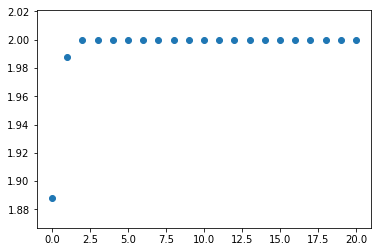

In [19]:
# In python you can create functions using the lambda function.
# For example: with the following decleration, f is now a function for which f(x) evaluates sin(x)
# f = lambda x: np.sin(x)


def banach_fp(f, x_0, n_max ):
    num_iter = 0
 
    xs = []  # Collect the computed midpoints
    fxs = [] # Collect corresponding function values
    errs =[]
    x = x_0
    while (num_iter <= n_max):
        xs.append(x)
        fxs.append(f(x))
        x_temp = f(x)
        err = abs(x-x_temp)
        errs.append(err)
        x = x_temp
        num_iter += 1
        
        
    return (xs, fxs, errs) 

xs, fxs, errs = banach_fp(f, 0.1, 20)

itter = np.arange(0,21,1)

plt.figure()
plt.scatter(itter, errs)
plt.show()

    # f: the function for which to solve x=f(x)
    # x0: initial value
    # n: number of iterations
    
    # your code here
    

# The banac_fp function is called in the following way:
# x = banach_fp(f, x0, n, p)

<font color='blue'>
    
   Your comments here: 
  
   As we can see, the error quickly grows to $2$, and stays there steadily throughout the sequence. The method does not converge for this function, and can therefore not be used to find a solution. 

</font>

As you hopefully observed in the previous subproblem, not all fixed point iterations will converge. However, we can in some cases modify the fixed point iteration such that it converges. If we for example add some constant or variable to both sides, the solution does not change. Therefore, let $p$ be some parameter, and add $px$ to both sides of our system to obtain

$$ x + px = \cos(0.5\pi x) + 1 + px $$

Verify for yourselves that this can be rewritten into

$$ x = \frac{1}{1+p} \big( \cos(0.5\pi x) + 1 + px \big) =: g(x) $$

We will in the following assume $p\geq0$.

**b)** Modify your code to run the fixed point iteration to run $x_{n+1} = g(x_n)$. Test different values of $0\leq p\leq 2$. Which values of $p$ seem to give convergence?

*Hint*: If you followed the template above, you can reuse the banach_fp function and just change the function $f$.

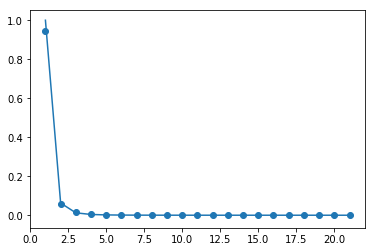

In [66]:
def banach_fp_modified(f, x_0, n_max ,p):
    
    
    g = lambda x: (1/(1+p)*(f(x)+p*x))
    num_iter = 0
 
    xs = []  # Collect the computed midpoints
    gxs = [] # Collect corresponding function values
    errs =[]
    x = x_0
    while (num_iter <= n_max):
        xs.append(x)
        fxs.append(g(x))
        x_temp = g(x)
        err = abs(x-x_temp)
        errs.append(err)
        x = x_temp
        num_iter += 1
        
        
    return (xs, gxs, errs) 
xs, gxs, errs = banach_fp_modified(f, 0.1, 20, 1)

itter = np.arange(1,22,1)
q= lambda x: 1/x**(4)

plt.figure()
plt.scatter(itter, errs)
plt.plot(itter, q(itter))
plt.show()

<font color='blue'>
    
   Your comments here: 

</font>

**c)** Test $p=0.5,1,1.5$ and $2$ and make a convergence plot. Additionally, give a rough estimate of the convergence rate of the method.  

*Hint:* For fixed point iterations, the error is in general of the form $\|x-x^\ast\| = \mathcal O(q^n)$, where $q$ determines the order of convergence. Plot lines of the form $l(x) \propto q^n$ and experiment to find values of $q$ which corresponds to the convergence plots for the fixed point iterations.

In [ ]:
# your code here

<font color='blue'>
Fill in your observed convergence rates in the following table:
</font>

| $p$ | $q$  |
|:---:|:----:|
| 0.5 |    1 | ?
| 1.0 |    4 |
| 1.5 |    3 |
| 2.0 |    3 |

**d)** Show that the Lipschitz constant for $g$ with domain $[0,2]$ is given by 
$$ L = \frac{1}{1+p}\max\{p,0.5\pi-p\}. $$


The derivative of $g$ is given by:
\begin{align*}
g'(x) = \frac{1}{1+p}\big(-0.5\pi\sin(0.5\pi x) + p\big).
\end{align*}

Then we can calculate the Lipschitz constant by
\begin{align*}
L &= \max_{x\in[0, 2]}|g'(x)| \\
&= \max_{x\in[0, 2]}\{g'(x), -g'(x)\} \\
&= \frac{1}{1+p}\max_{x\in[0, 2]}\{-0.5\pi\sin(0.5\pi x) + p, 0.5\pi\sin(0.5\pi x) - p\} \\
&= \frac{1}{1+p}\max_{x\in[0, 2]}\{0 + p, 0.5\pi - p\} \\
&= \frac{1}{1+p}\max_{x\in[0, 2]}\{p, 0.5\pi - p\}
\end{align*}


The Banach fixed point theorem tells us that $\|x_{n+1} - x^\ast\| \leq L\|x_n - x^\ast\|$. In particular, this means that $\|x_n - x^\ast\| = \mathcal O(L^n)$. 

**e)** Compute $L$ and $f'(1)$ for $p = 0.5,1,1.5$ and $2$ and compare with the order of convergence you observed in problem **2b**. What do you observe?

<font color='red'>
SKAL DET VÆRE g'(x) ?
</font>


| $p$ | $L$  | $|g'(1)|$ | $q$  |
|:---:|:----:|:-----------:|:----:|
| 0.5 | 0.71 |  0.05   |  1   |
| 1.0 | 0.5  |  0.21   |  4   |
| 1.5 | 0.6  |  0.37   |  3   |
| 2.0 | 0.67 |  0.48   |  3   |


We see $L$ is less than one for all the $p$'s in the table. Then $g$ is a contraction, and which is necessary for the fixed point iteration to converge. As we saw earlier, the method converges fastest for low $L$, which confirms what we saw from the computed $q$.